In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=tf.keras.datasets.cifar10
data_train,data_test=dataset.load_data()
x_train,y_train=data_train
x_test,y_test=data_test

In [3]:
from tensorflow.keras.applications import InceptionV3

In [4]:
base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

In [5]:
data_augumentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.3),
])

In [6]:
pre_process=preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [7]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [8]:
base_model.trainable = False

In [9]:
# base_model.summary()

In [10]:
inputs = tf.keras.Input(shape=(75, 75, 3))

In [11]:
x = data_augumentation(inputs)

In [12]:
x = preprocess_input(x)

In [13]:
x = base_model(x, training=False)

In [14]:
x=tf.keras.layers.GlobalAveragePooling2D()(x)

In [15]:
x=tf.keras.layers.Dense(1024, activation='relu')(x)

In [16]:
x = tf.keras.layers.Dropout(0.5)(x)

In [17]:
x=tf.keras.layers.Dense(128, activation='relu')(x)

In [18]:
x = tf.keras.layers.Dropout(0.5)(x)

In [19]:
output=tf.keras.layers.Dense(10, activation='softmax')(x)

In [20]:
model = tf.keras.Model(inputs, outputs=output)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,033,450 (91.68 MB)

 Trainable params: 2,230,666 (8.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [23]:
len(model.trainable_variables)

6

In [24]:
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

In [25]:
acc=[]
val_acc=[]
loss=[]
val_loss=[]

In [26]:
batch_size=128
epochs=10
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10


/opt/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.2789 - loss: 2.0237 - val_accuracy: 0.5255 - val_loss: 1.3804
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.4320 - loss: 1.6083 - val_accuracy: 0.5558 - val_loss: 1.3130
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.4576 - loss: 1.5498 - val_accuracy: 0.5628 - val_loss: 1.2704
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 703s 2s/step - accuracy: 0.4716 - loss: 1.5175 - val_accuracy: 0.5731 - val_loss: 1.2298
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 483s 1s/step - accuracy: 0.4808 - loss: 1.5021 - val_accuracy: 0.5777 - val_loss: 1.2131
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.4870 - loss: 1.4710 - val_accuracy: 0.5839 - val_loss: 1.2092
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.4924 - loss: 1.4630 - val_accuracy: 0.5860 - val_loss: 1.1936
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 636s 2s/step - accuracy: 0.4962 - loss: 1.4536 - val_accuracy: 0.589

In [27]:
# acc+= history.history['accuracy']
# val_acc+=history.history['val_accuracy']
# loss+=history.history['loss']
# val_loss+=history.history['val_loss']

In [28]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 330ms/step - accuracy: 0.5974 - loss: 1.1668
59.859997034072876


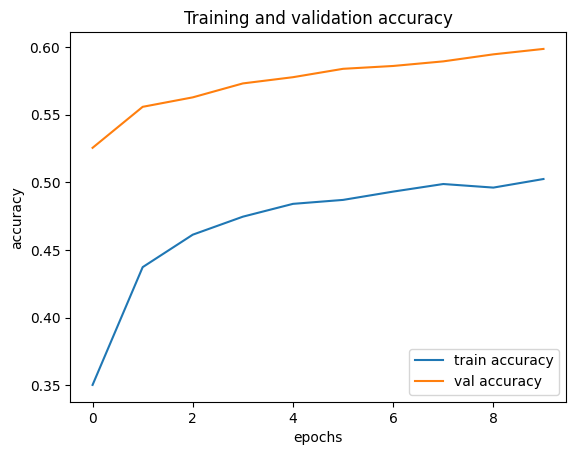

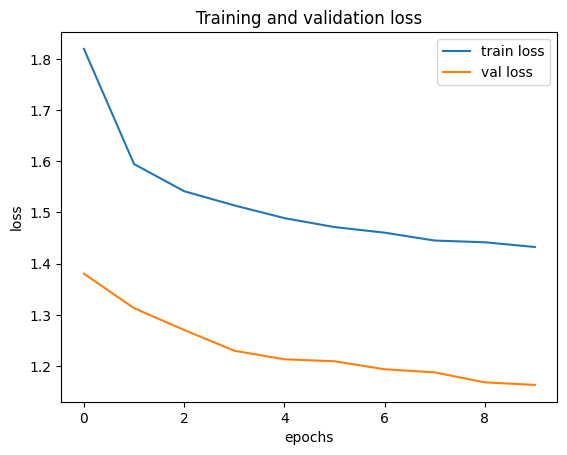

In [30]:

acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [31]:
base_model.trainable=True

In [32]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  311


In [33]:
fine_tune_at=240
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [34]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [35]:
fine_tune_epochs = 10
total_epochs =  20
batch_size=128
epochs=10
history_fine = model.fit(x_train,y_train,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=(x_test,y_test))

Epoch 11/20


/opt/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 188ms/step - accuracy: 0.4668 - loss: 1.5490 - val_accuracy: 0.6584 - val_loss: 0.9730
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 203ms/step - accuracy: 0.5833 - loss: 1.2323 - val_accuracy: 0.6930 - val_loss: 0.8798
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 342s 219ms/step - accuracy: 0.6113 - loss: 1.1565 - val_accuracy: 0.7180 - val_loss: 0.8280
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 324s 207ms/step - accuracy: 0.6273 - loss: 1.1066 - val_accuracy: 0.7190 - val_loss: 0.8111
Epoch 15/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 488s 312ms/step - accuracy: 0.6407 - loss: 1.0631 - val_accuracy: 0.7320 - val_loss: 0.7881
Epoch 16/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 430s 275ms/step - accuracy: 0.6475 - loss: 1.0383 - val_accuracy: 0.7399 - val_loss: 0.7559
Epoch 17/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 413s 264ms/step - accuracy: 0.6616 - loss: 1.0062 - val_accuracy: 0.7428 - val_loss: 0.7434
Epoch 18/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 443s 283ms/step - accura

In [36]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=1)
print(accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.7498 - loss: 0.7264
74.91999864578247


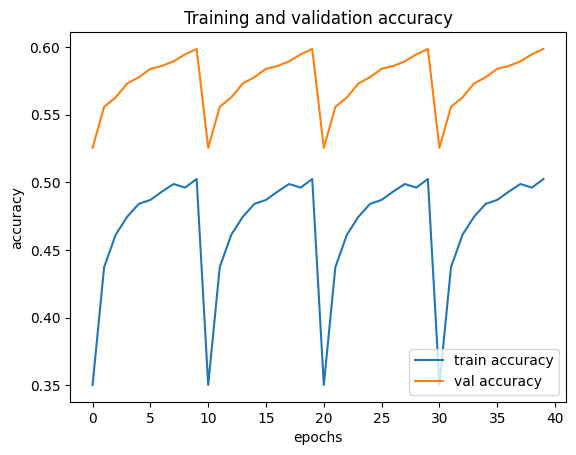

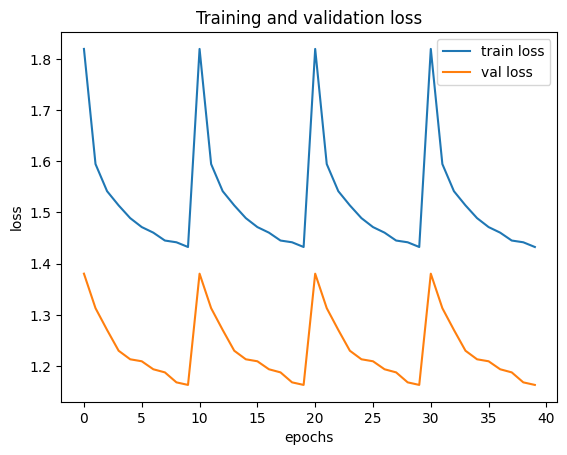

In [40]:
acc+= history.history['accuracy']
val_acc+=history.history['val_accuracy']
loss+=history.history['loss']
val_loss+=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [ ]:
print(x_train[0].shape)


(75, 75, 3)


In [38]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step


In [41]:
print(predictions[0])

[2.9717275e-04 1.1629459e-03 3.8770961e-03 2.5103468e-01 3.6421025e-04
 7.3327160e-01 1.6926249e-03 6.1936616e-03 7.2054169e-04 1.3854925e-03]


In [42]:
predicted_labels = np.argmax(predictions, axis=1)

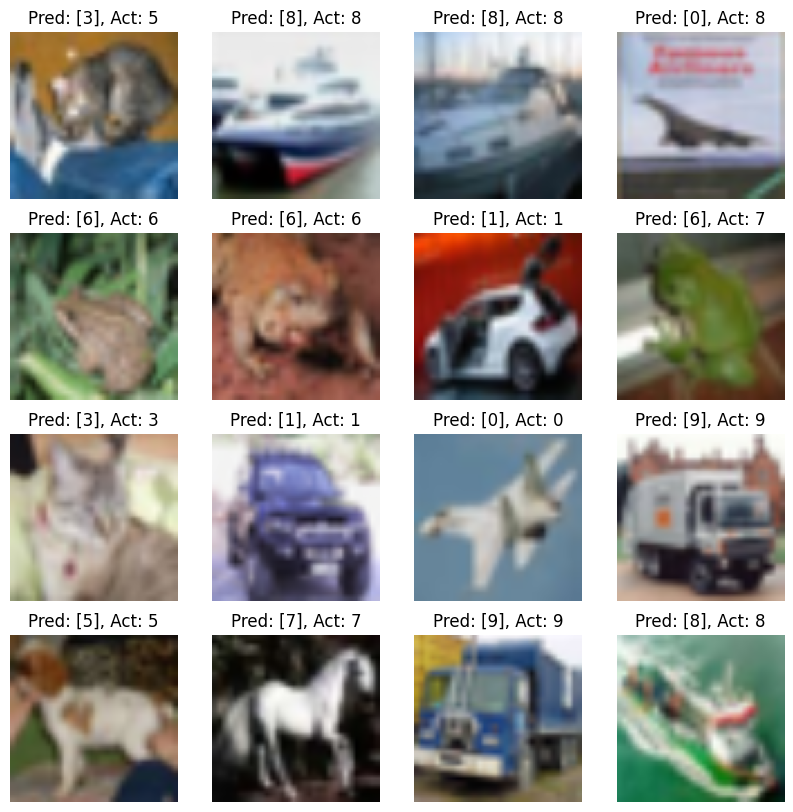

In [43]:
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}, Act: {predicted_labels[i]}')
    plt.axis("off")